In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import matplotlib.pyplot as plt
from util import *
from loss import *
from Estimator import *

### feature = 20

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


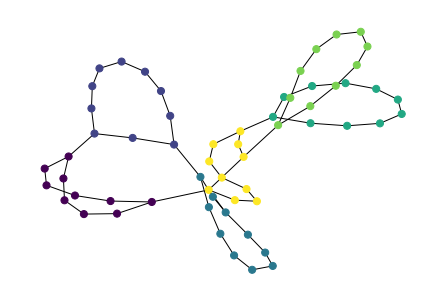

In [2]:
list_shapes = ['nx.cycle_graph'] * 6
list_shapes_args = [[10]] * 6
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=20, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

#### elastic net

In [3]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = ElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = ElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


#### corrected elastic net

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = correctedElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s

#### Lasso 

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num3 = len(l3s)
num = num1 * num3
flag = 1
f = plt.figure(figsize=(12,10))
for i in range(num1):
    for k in range(num3):
        ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
        ele = LassoEstimator(l1=l1s[i], l2=0, l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
        ele.fit(node_features, maxiter=1000)
        ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
        ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l3:'+str(int(np.round(l3s[k]))))
        flag = flag+1
del l1s
del l3s

#### Ridge

In [ ]:
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num2 = len(l2s)
num3 = len(l3s)
num = num2 * num3 
flag = 1
f = plt.figure(figsize=(12,10))
for j in range(num2):
    for k in range(num3):
        ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
        ele = RidgeEstimator(l1=0, l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
        ele.fit(node_features, maxiter=1000)
        ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
        ax0.set_title('l2:'+str(l2s[j])+','+'l3:'+str(np.round(l3s[k])))
        flag = flag+1
del l2s 
del l3s

#### Sparse elastic net

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = sparseElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(l1s[i])+','+'l2:'+str(l2s[j])+','+'l3:'+str(np.round(l3s[k])))
            flag = flag+1
del l1s 
del l2s 
del l3s

### feature=50

In [ ]:
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

#### elastic net

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = ElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s

#### corrected elastic net

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = correctedElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s

#### Lasso

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num3 = len(l3s)
num = num1 * num3
flag = 1
f = plt.figure(figsize=(12,10))
for i in range(num1):
    for k in range(num3):
        ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
        ele = LassoEstimator(l1=l1s[i], l2=0, l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
        ele.fit(node_features, maxiter=1000)
        ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
        ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l3:'+str(int(np.round(l3s[k]))))
        flag = flag+1
del l1s
del l3s

#### Ridge

In [ ]:
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num2 = len(l2s)
num3 = len(l3s)
num = num2 * num3 
flag = 1
f = plt.figure(figsize=(12,10))
for j in range(num2):
    for k in range(num3):
        ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
        ele = RidgeEstimator(l1=0, l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
        ele.fit(node_features, maxiter=1000)
        ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
        ax0.set_title('l2:'+str(l2s[j])+','+'l3:'+str(np.round(l3s[k])))
        flag = flag+1
del l2s 
del l3s

#### Sparse elastic net

In [ ]:
l1s = np.float32([1, 10, 20, 50])
l2s = np.float32([1, 10, 50, 100])
l3s = np.float32([1, 5, 10, 20])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,35))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
            ele = sparseElastEstimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
            ele.fit(node_features, maxiter=1000)
            ele.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(l1s[i])+','+'l2:'+str(l2s[j])+','+'l3:'+str(np.round(l3s[k])))
            flag = flag+1
del l1s 
del l2s 
del l3s